### 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Loan_Data.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
df.nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
Loan_Status       2
dtype: int64

In [ ]:
df["Loan_Status"].isna().sum()

0

In [ ]:
df["Credit_History"].isna().sum()

50

In [ ]:
df.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [ ]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,1.0,Semiurban,Y


In [ ]:
df["Gender"].mode()[0]

'Male'

In [ ]:
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
df.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1
610,1,1,3,0,0,1,0,1
611,1,1,1,0,0,1,2,1
612,1,1,2,0,0,1,2,1


In [ ]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((429, 7), (185, 7))

In [ ]:
X_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
Gender,1.000000,0.359786,0.112129,0.054621,-0.007517,-0.035905,-0.019537
Married,0.359786,1.000000,0.305456,-0.002053,0.050284,0.035459,-0.028629
Dependents,0.112129,0.305456,1.000000,0.071083,0.062906,-0.033991,-0.007900
Education,0.054621,-0.002053,0.071083,1.000000,-0.042470,-0.073571,-0.068373
Self_Employed,-0.007517,0.050284,0.062906,-0.042470,1.000000,-0.005616,-0.000699
Credit_History,-0.035905,0.035459,-0.033991,-0.073571,-0.005616,1.000000,0.010061
Property_Area,-0.019537,-0.028629,-0.007900,-0.068373,-0.000699,0.010061,1.000000


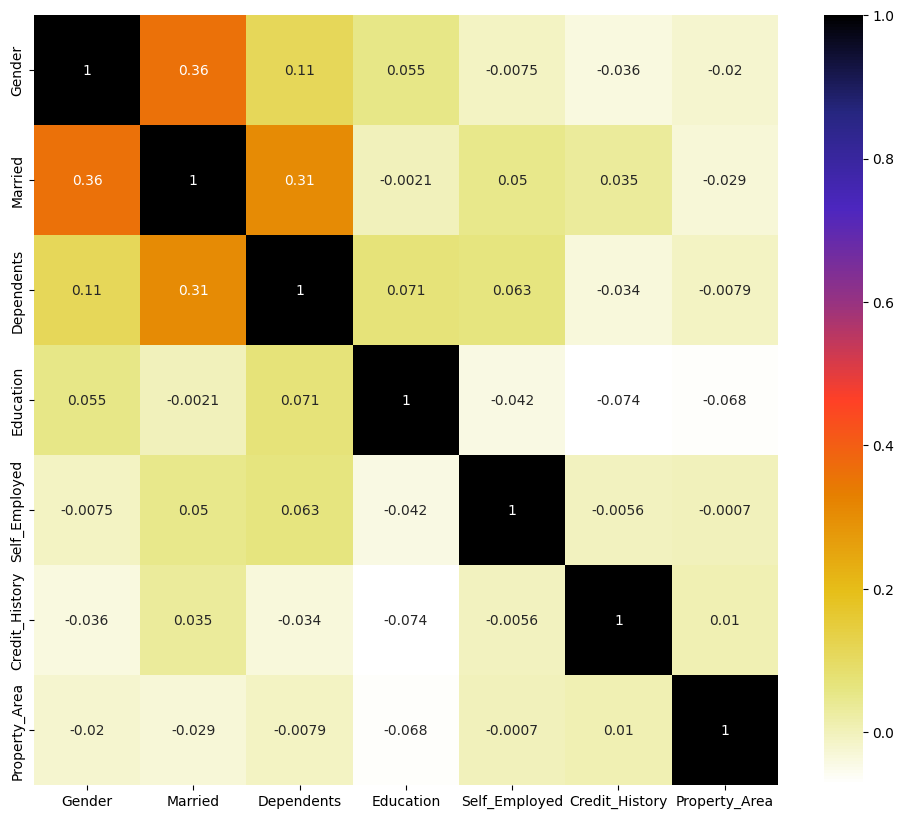

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.07)  #0.07 is 7%....basically take 0.7
len(set(corr_features))

4

In [ ]:
corr_features

{'Credit_History', 'Dependents', 'Education', 'Married'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Gender,Self_Employed,Property_Area
454,1,1,1
52,0,0,1
536,1,0,2
469,1,0,2
55,1,0,1
...,...,...,...
242,1,0,2
515,1,0,0
582,0,0,1
225,1,0,0
